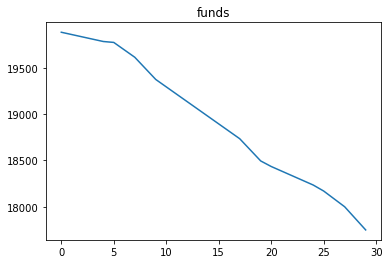

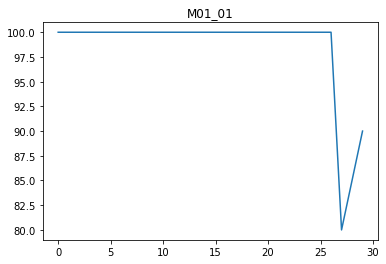

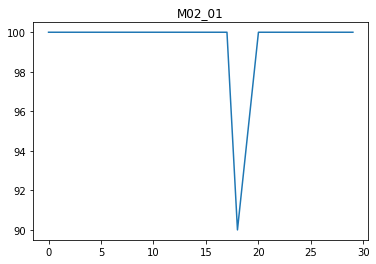

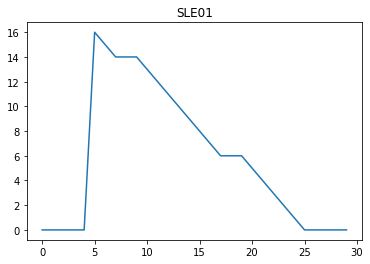

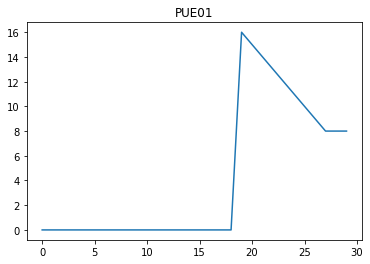

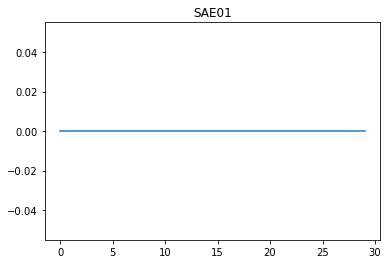

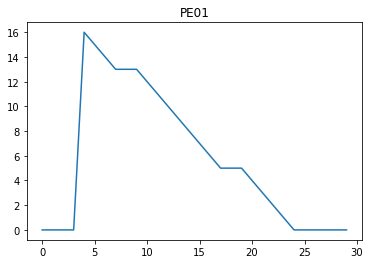

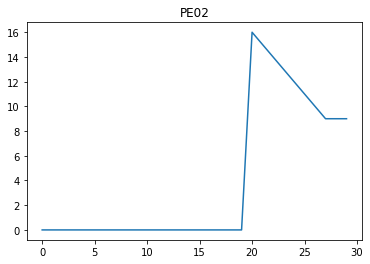

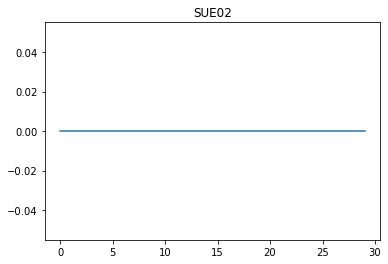

In [52]:
PORT = 8000

import requests

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Make a request to create a new simulation
def init():
    url = f'http://127.0.0.1:{PORT}/control/poll/create_from_example/sim3'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

# Make a request to run one step
def next_step():
    url = f'http://127.0.0.1:{PORT}/control/poll/run_one_step'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

# Make a request to get the current funds available
def get_next_point():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Funds : {jresponse['funds_in_eur']}")
        return jresponse['funds_in_eur']
    else:
        return None

# Make a request to get the status of every machine
def get_status_machines():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/machine'
    response = requests.get(url)
    jresponse = response.json()
    machines = []

    for i in range (len(jresponse)):
        machines.append((jresponse[i]['name'],jresponse[i]['operating_efficiency_percentage']))
    return machines

#Make a request to get the health of every employee
def get_employee_health():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/employee'
    response = requests.get(url)
    jresponse = response.json()
    employee = []
    for i in range (len(jresponse)):
        employee.append((jresponse[i]['name'],jresponse[i]['remaining_sickness_in_hours_worked']))
    return employee

# List holding the x values
data_x = []
# List holding the y values
data_y = []
# List holding the machine status
machines = []
# List holding the employee status
employees = []
# Create sim
init()

for x in range(0, 30):
    next_step() # Do one step
    y = get_next_point() # Request a new random value and store in y
    m = get_status_machines()
    e = get_employee_health()
    machines.append(m)
    employees.append(e)
    data_x.append(x)  # Add the current x to the list
    data_y.append(y) # Add the current y to the list
    clear_output(wait=True) # Clear / remove whatever was already plotted before
    plt.figure(1)
    plt.plot(data_x, data_y)
    plt.title("funds")# Re-plot the data with the new added values in the list
    for i in range (len(m)):
            plt.figure(2+i)
            data = []
            for j in range (len(machines)):
                data.append(machines[j][i][1])
            plt.plot(data_x,data)
            plt.title(m[i][0])
    for i in range (len(e)):
        plt.figure(2+len(m)+i)
        data=[]
        for j in range (len(employees)):
            data.append(employees[j][i][1])
        plt.plot(data_x,data)
        plt.title(e[i][0])
            
    plt.show() # Make sure to display the new plot, to make it visible
    
 # Wait 0.1 seconds before the next request



In [47]:
url = f'http://127.0.0.1:{PORT}/enterprise/poll/employee'
response = requests.get(url)

In [48]:
print(response.json())

[{'name': 'SLE01', 'type_name': 'SalesEmployee', 'standard_hourly_wage': 20.0, 'overtime_hourly_wage': 30.0, 'max_standard_hours_per_day': 8.0, 'max_overtime_hours_per_day': 2.0, 'working_hours_per_day': 8.0, 'sickness_probability_per_hour_worked': 0.05, 'sickness_duration_in_hours_worked': 16.0, 'remaining_sickness_in_hours_worked': 0.0, 'department': {'name': 'SLD01', 'type_name': 'SalesDepartment', 'minimum_employee_count_for_enterprise_operation': 1.0}}, {'name': 'PUE01', 'type_name': 'PurchasingEmployee', 'standard_hourly_wage': 20.0, 'overtime_hourly_wage': 30.0, 'max_standard_hours_per_day': 8.0, 'max_overtime_hours_per_day': 2.0, 'working_hours_per_day': 8.0, 'sickness_probability_per_hour_worked': 0.05, 'sickness_duration_in_hours_worked': 16.0, 'remaining_sickness_in_hours_worked': 8.0, 'department': {'name': 'PUD01', 'type_name': 'PurchasingDepartment', 'minimum_employee_count_for_enterprise_operation': 1.0}}, {'name': 'SAE01', 'type_name': 'SupervisorAdminEmployee', 'standa

In [11]:
type(response.json())

list

In [25]:
print(get_status_machines())

[('M01_01', 100.0), ('M02_01', 100.0)]
